In [4]:
%load_ext autoreload
%autoreload 2
%pylab inline

import numpy as np
from arnie.pfunc import pfunc
from arnie.bpps import bpps
import arnie.utils as utils
from decimal import Decimal

from arnie.mea.threshknot import threshknot_util

from arnie.mea.mea import MEA

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Populating the interactive namespace from numpy and matplotlib


# Quick use of threshknot util for looking at bpp matrices

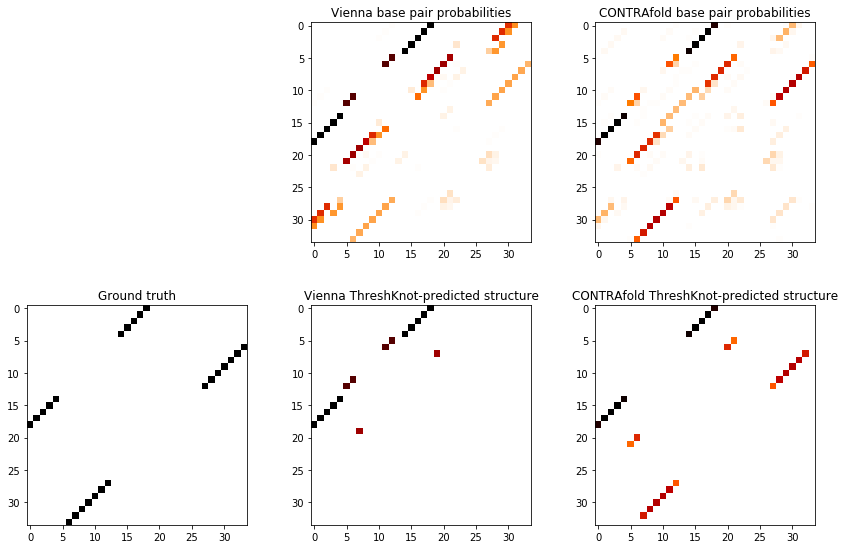

In [39]:
# MMTV pseudoknot sequence:
sequence = "GGCGCAGUGGGCUAGCGCCACUCAAAAGGCCCAU"
true_struct = '(((((.[[[[[[[.)))))........]]]]]]]'

figure(figsize=(12,8))

subplot(2,3,4)
title('Ground truth')
imshow(utils.convert_dotbracket_to_matrix(true_struct, allow_pseudoknots=True), cmap='gist_heat_r')

subplot(2,3,2)
title('Vienna base pair probabilities')
imshow(bpps(sequence, package='vienna_2'), cmap='gist_heat_r')

subplot(2,3,3)
title('CONTRAfold base pair probabilities')
imshow(bpps(sequence, package='contrafold'), cmap='gist_heat_r')

subplot(2,3,5)
title('Vienna ThreshKnot-predicted structure')
imshow(threshknot_util(sequence, package='vienna_2'), cmap='gist_heat_r')

subplot(2,3,6)
title('CONTRAfold ThreshKnot-predicted structure')
imshow(threshknot_util(sequence, package='contrafold'), cmap='gist_heat_r')

tight_layout()

# Use Pseudoaccuracy metrics existing in MEA class with Probknot/Threshknot model

In [37]:
avail_packages = utils.package_list()

print('Non-pseudoknotted Max. Expected Pseudoaccuracy')
print('Predicted structure, expected MCC, actual MCC')
for pkg in avail_packages:
    bp_matrix = bpps(sequence, package=pkg)
    mea_mdl = MEA(bp_matrix,gamma=10)
    [exp_sen, exp_ppv, exp_mcc, exp_fscore] = mea_mdl.score_expected()
    [sen, ppv, mcc, fscore] = mea_mdl.score_ground_truth(true_struct)
    print("%s\t\t%s\t%.2f\t%.2f" % (pkg, mea_mdl.structure, exp_mcc, mcc))

Non-pseudoknotted Max. Expected Pseudoaccuracy
Predicted structure, expected MCC, actual MCC
rnastructure		(((((((....)).))))).(......)......	0.51	0.58
rnasoft		......(((((((..............)))))))	0.47	0.76
contrafold_2		(((((((....)).)))))...............	0.39	0.64
vienna_2		(((((((....)).)))))...............	0.49	0.64


Pseudoknotted ProbKnot-based Max Expected Pseudoaccuracy
Predicted structure, expected MCC, actual MCC
rnastructure		((((((((...)).))))))..............	0.45	0.64
rnasoft		(((((((((((((.)))))..).....)))))))	0.49	1.00
contrafold_2		(((((((((((((.))))).)).....)))))).	0.44	0.96
vienna_2		((((((((...)).))))))..............	0.50	0.64


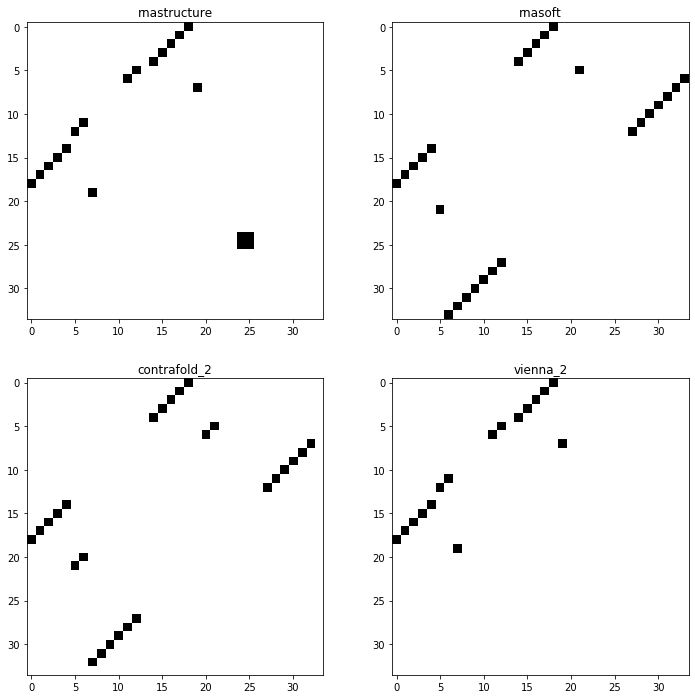

In [42]:
print('Pseudoknotted ProbKnot-based Max Expected Pseudoaccuracy')
print('Predicted structure, expected MCC, actual MCC')

figure(figsize=(12,12))
for i, pkg in enumerate(avail_packages):
    
    bp_matrix = bpps(sequence, package=pkg)

    # Run ProbKnot model:
    probknot_mdl = MEA(bp_matrix,run_probknot_heuristic=True, theta=0)
    [exp_sen, exp_ppv, exp_mcc, exp_fscore] = probknot_mdl.score_expected()
    subplot(2,2,i+1)
    imshow(probknot_mdl.MEA_bp_matrix,cmap='gist_heat_r')
    title(pkg)
    [sen, ppv, mcc, fscore] = probknot_mdl.score_ground_truth(true_struct)
    print("%s\t\t%s\t%.2f\t%.2f" % (pkg, probknot_mdl.structure, exp_mcc, mcc))

# For this small example, max expected pseudoaccuracies between dynamic programming and probknot - based methods aren't very different.